In [1]:
#Import Thư viện
import numpy as np
import pandas as pd
import statistics as sta
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 50
plt.rcParams.update({'font.size': 18})

In [2]:
data = pd.read_csv("dulieucrawl1.csv")
data.sample(10)

,address,hotel_name,languages,number_room_dining,number_room_suite,rank,review,review_number,price_max,price_min,room_number,number_images_Traveler
1201,"102/6-108/6 Tran Phu Street Ward 5, Vung Tau 7...",Valley Mountain Hotel,"All languages,English,French,Japanese",25.0,28.0,20.0,Very good,45.0,1906977.0,720930.0,22.0,68.0
416,"Khu Pho Hai Phong 1, Long Hai Town Long Dien D...",Palace Resort Long Hai Beach,"All languages,English,Vietnamese,French",1.0,7.0,64.0,Very good,15.0,2181818.0,1568182.0,7.0,27.0
769,"117 Thuy Van Thang Tam, Vung Tau 790000 Vietnam",ibis Styles Vung Tau,"All languages,Vietnamese,English",34.0,36.0,1.0,Excellent,206.0,2000000.0,1272727.0,250.0,259.0
831,"47 Phan Van Tri street Thang Tam ward, Vung Ta...",VeeVoo hotel,"All languages,English,Vietnamese,French",3.0,31.0,6.0,Very good,18.0,681818.0,340909.0,30.0,31.0
79,"07-08 Ta Uyen Ward 3, Vung Tau 78000 Vietnam",Joi Hotel,NaN,24.0,18.0,NaN,NaN,NaN,NaN,NaN,51.0,18.0
305,"12/1 Hoang Hoa Tham, Ward 2, Vung Tau Vietnam",Co Ba Hotel,"All languages,English",NaN,NaN,60.0,Very good,8.0,697674.0,534884.0,30.0,NaN
1154,"01 Thuy Van, Ward 8, Vung Tau Vietnam",Hai Duong Intourco Resort,"All languages,English,Russian,French",15.0,57.0,8.0,Very good,23.0,1840909.0,1045455.0,71.0,45.0
864,"B10, 84 Phan Chu Trinh, Vung Tau Vietnam",The Wind Boutique Resort,"All languages,English,Chinese (Trad.),Vietnamese",7.0,50.0,8.0,Excellent,107.0,2659091.0,1750000.0,19.0,189.0
431,"03-06 Ha Long Ward 2, Vung Tau 790000 Vietnam",Mercure Vung Tau,"All languages,English,Vietnamese,Japanese,French",23.0,48.0,2.0,Excellent,127.0,2681818.0,1681818.0,80.0,221.0
629,"01 Nguyen Trai Ward 1, Vung Tau 790000 Vietnam",Palace Hotel,"All languages,English,Chinese (Trad.),Vietnamese",3.0,43.0,13.0,Very good,174.0,1534884.0,883721.0,112.0,100.0


In [22]:
dinh_tinh = {}
columns_dinh_tinh = ['price_max', 'price_min', 'review_number	']

In [23]:
data_dinh_tinh = pd.DataFrame(dinh_tinh)

In [24]:
def data_dinh_tinh(a):
    x = data.groupby(a)[a].count()
    dt = pd.DataFrame(x)
    dt.columns = ['Percent']
    percent = []
    for i in dt['Percent']:
        x = (i/len(data[a]))*100
        percent.append(x)
    dt['Percent'] = percent
    print(dt)
    mylabels = dt.index
    fig = plt.figure(figsize = (5, 10))
    # barplot
    sns.barplot(percent, mylabels, data = dt, orient = 'h')

            Percent
price_max          
386364.0   2.338710
395349.0   1.048387
636364.0   2.500000
651163.0   0.806452
659091.0   2.258065
674419.0   1.129032
681818.0   7.338710
697674.0   2.741935
704545.0   2.258065
720930.0   1.129032
750000.0   5.161290
767442.0   1.532258
931818.0   4.758065
953488.0   1.854839
1431818.0  4.516129
1465116.0  2.177419
1500000.0  2.500000
1534884.0  0.806452
1704545.0  2.177419
1744186.0  1.129032
1840909.0  2.903226
1863636.0  2.500000
1883721.0  0.483871
1906977.0  0.887097
2000000.0  2.983871
2046512.0  0.322581
2181818.0  4.919355
2232558.0  1.693548
2340909.0  2.661290
2395349.0  0.645161
2659091.0  2.338710
2681818.0  2.741935
2720930.0  0.967742
2744186.0  0.564516
2818182.0  2.500000
2883721.0  0.806452
3227273.0  2.580645
3302326.0  0.725806
4022727.0  2.258065
4116279.0  1.048387
4318182.0  2.500000
4418605.0  0.806452
8045455.0  2.500000
8232558.0  0.887097


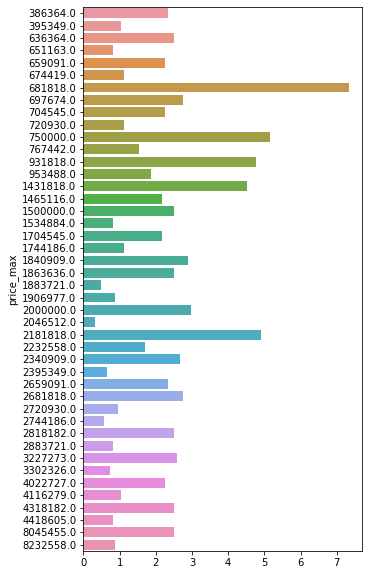

In [25]:
data_dinh_tinh('price_max')

            Percent
price_min          
272727.0   9.838710
279070.0   3.709677
295455.0   2.500000
302326.0   0.806452
340909.0   2.500000
348837.0   0.806452
363636.0   2.258065
372093.0   1.129032
454545.0   2.258065
465116.0   1.048387
477273.0   5.000000
488372.0   1.612903
522727.0   2.258065
534884.0   1.129032
545455.0   2.338710
558140.0   0.967742
704545.0   2.500000
720930.0   0.887097
863636.0   2.500000
883721.0   0.806452
886364.0   2.177419
906977.0   1.209677
931818.0   2.500000
953488.0   0.887097
1045455.0  2.903226
1069767.0  0.483871
1090909.0  2.500000
1116279.0  0.806452
1136364.0  2.177419
1162791.0  1.129032
1272727.0  2.983871
1302326.0  0.322581
1340909.0  2.661290
1372093.0  0.645161
1568182.0  2.419355
1604651.0  0.887097
1681818.0  2.741935
1720930.0  0.564516
1750000.0  2.338710
1790698.0  0.967742
1795455.0  2.500000
1837209.0  0.806452
1909091.0  2.258065
1953488.0  1.048387
2227273.0  2.580645
2279070.0  0.725806
2386364.0  2.500000
2441860.0  0.806452


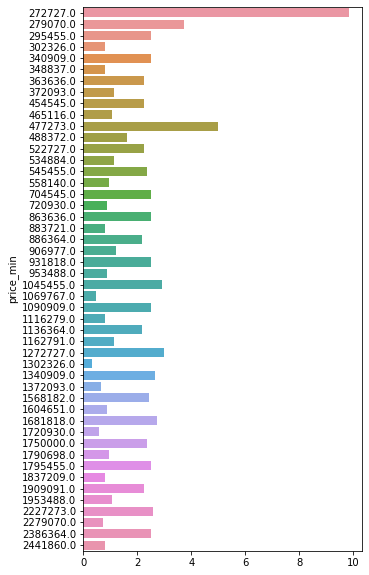

In [26]:
data_dinh_tinh('price_min')

                Percent
review_number          
1.0            3.387097
2.0            9.919355
4.0            3.387097
6.0            3.387097
8.0            3.387097
10.0           3.387097
13.0           3.306452
15.0           3.306452
17.0           3.387097
18.0           3.306452
23.0           3.387097
36.0           3.306452
42.0           3.306452
45.0           6.774194
67.0           3.306452
74.0           3.306452
78.0           3.306452
103.0          3.306452
107.0          6.612903
127.0          3.306452
169.0          3.387097
174.0          3.306452
206.0          3.306452
461.0          3.306452
895.0          3.306452


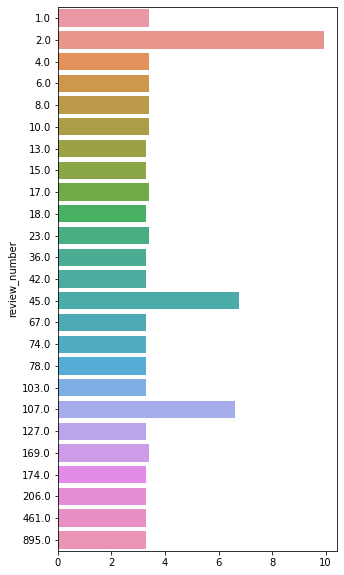

In [29]:
data_dinh_tinh('review_number')

             Percent
review              
Average     3.306452
Excellent  49.919355
Very good  43.467742


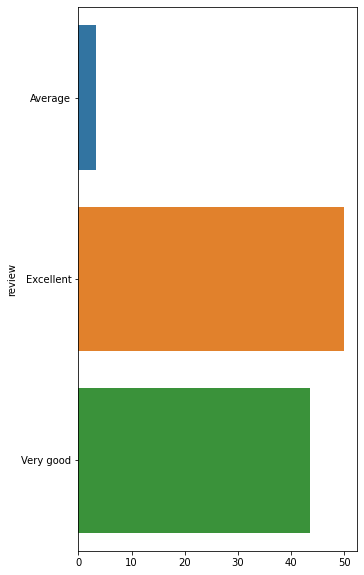

In [30]:
data_dinh_tinh('review')

In [3]:
#Plot
def hist_plot(data):
    # Kiem tra data co chuan hay khong?
    mean = np.mean(data)
    # ddof=1 :: hiệu chỉnh
    std = np.std(data, ddof=1)
    domain = np.linspace(np.min(data), np.max(data))
    plt.plot(domain, stats.norm.pdf(domain, mean, std))
    #density=True :: chuẩn hóa dữ liệu về normal
    plt.hist(data, edgecolor='green', density=True)
    plt.show()
    
def qq_plot(data):
    def standadize(data):
        mean = np.mean(data)
        std = np.std(data)
        return (data - mean)/std
    
    sm.qqplot(standadize(data), line ='45')
    plt.show()

In [4]:
#Hàm Kolmogorov để kiểm tra xem các mẫu hiện tại có tuân theo phân phối chuẩn hay không
def Kolmogorov(data):
    print("Kiểm định Kolmogorov -", data.name)
    k, p = stats.kstest(rvs=data, cdf='norm', args=(np.mean(data), np.std(data)))
    if p > 0.05:
        print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này ngụ ý rằng các mẫu hiện tại tuân theo luật phân phối chuẩn''')
    else:
        print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này ngụ ý rằng các mẫu hiện tại không tuân theo luật phân phối chuẩn''')
    print("------------------------------")


#Hàm Barlett dùng để kiểm tra các mẫu hiện tại có mang tính đồng nhất về phương sai hay không
def bartlett(a, b, c): 
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Kiểm định Bartlett:")
    stat, pvalue = stats.bartlett(a, b, c)
    print("Statistic =", stat, "\n",
          "p value =", pvalue)
    if pvalue > 0.05:
        print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. 
        Điều này ngụ ý các mẫu hiện tại mang tính đồng nhất về phương sai''')
    else:
        print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. 
         Điều này ngụ ý mẫu hiện tại không đồng nhất về phương sai''')
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    

#Hàm kiểm định ANOVA 1 chiều
def anova(a, b, c):
    df = (a, b, c)
    print("Kiểm định ANOVA:")
    stat, pvalue = stats.f_oneway(a, b, c)
    print("Stat =", stat, "\n", "p value =", pvalue)
    if pvalue < 0.05:
        print("Có bằng chứng thống kê để bác bỏ giả thuyết H0")
    else:
        print("Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0")

def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [5]:
#Hàm describe để thống kê số liệu một cách đơn giản, ngắn gọn
data.describe()

,number_room_dining,number_room_suite,rank,review_number,price_max,price_min,room_number,number_images_Traveler
count,948.000000,948.000000,1199.000000,1199.000000,1.158000e+03,1.158000e+03,1158.000000,948.000000
mean,16.948312,45.930380,20.841535,97.969141,1.939550e+06,9.719805e+05,88.822971,156.506329
std,15.008286,55.572146,22.661402,176.428678,1.583234e+06,6.377012e+05,94.736265,247.603724
min,1.000000,7.000000,1.000000,1.000000,3.863640e+05,2.727270e+05,7.000000,7.000000
25%,4.000000,18.000000,5.000000,10.000000,7.209300e+05,3.720930e+05,20.000000,27.000000
50%,14.000000,34.000000,10.000000,42.000000,1.534884e+06,8.837210e+05,50.000000,68.000000
75%,24.000000,48.000000,29.000000,107.000000,2.395349e+06,1.372093e+06,112.000000,173.000000
max,70.000000,277.000000,98.000000,895.000000,8.232558e+06,2.441860e+06,356.000000,1118.000000


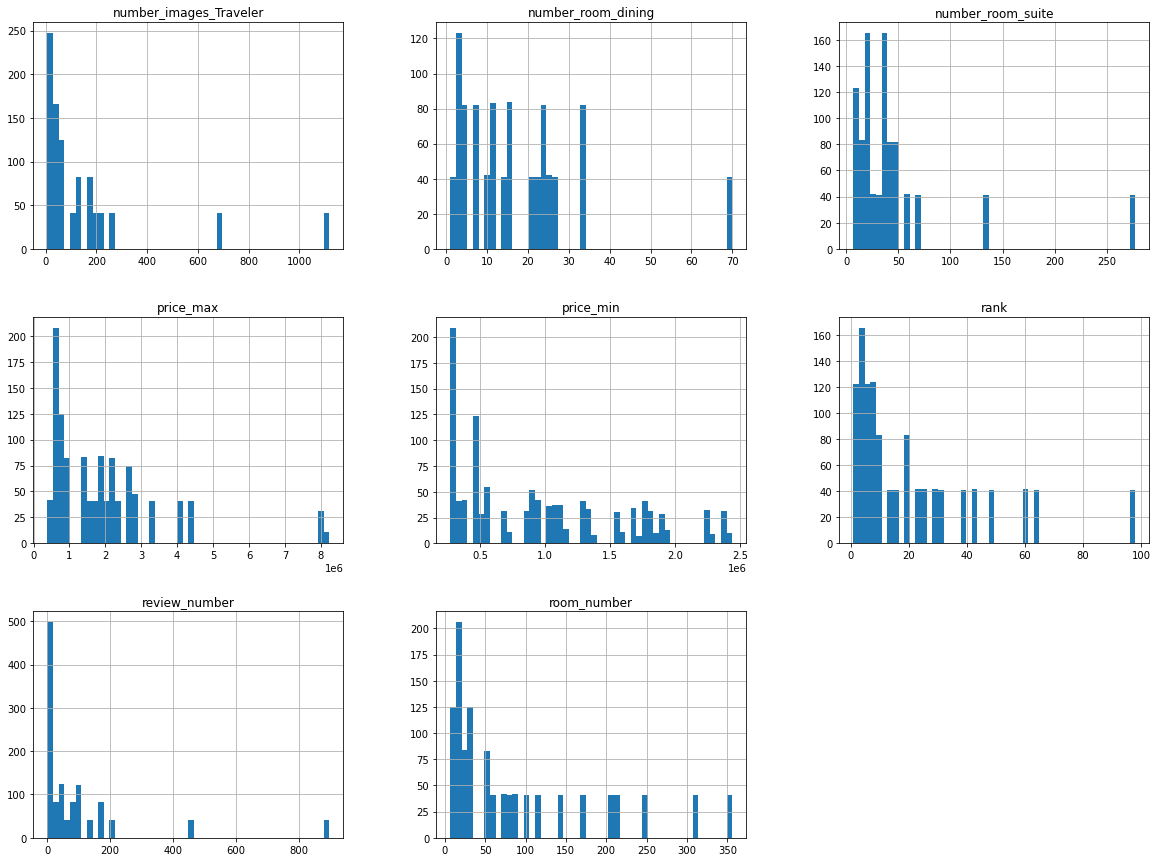

In [6]:
%matplotlib inline 
data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
#loai bo nhung hang chua NA cua tap du lieu
data_new = data.dropna()
print(data_new)

                                                address  \
2     302 Phan Chu Trinh Ward 2, Vung Tau 790000 Vie...   
3        09 Thong Nhat Street, Ward 1, Vung Tau Vietnam   
4     102/6-108/6 Tran Phu Street Ward 5, Vung Tau 7...   
5     Ben Cat Beach, Phuoc Thuan Ward Ho Tram Area, ...   
9          115 Tran Phu Ward 5, Vung Tau 790000 Vietnam   
...                                                 ...   
1229  Ben Cat Beach, Phuoc Thuan Ward Ho Tram Area, ...   
1230  6/11 Nguyen Du, Phuong 1, Thanh Pho, Vung Tau ...   
1231  102/6-108/6 Tran Phu Street Ward 5, Vung Tau 7...   
1233     09 Thong Nhat Street, Ward 1, Vung Tau Vietnam   
1238              01 Thuy Van, Ward 8, Vung Tau Vietnam   

                            hotel_name  \
2                         Novena Hotel   
3           Muong Thanh Vung Tau Hotel   
4                Valley Mountain Hotel   
5             River Ray Estates Resort   
9     Marina Bay Vung Tau Resort & Spa   
...                                ... 

In [8]:
#Sap xep lai du lieu theo thu tu
index = []
print(len(data_new))
for i in range (1, len(data_new)+1):
    index.append(i)
data_new["Index"] = index
index1 = data_new.set_index("Index")
new_data = index1.sort_index()
new_data.head(10)

825


<ipython-input-8-b628956718a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["Index"] = index


,address,hotel_name,languages,number_room_dining,number_room_suite,rank,review,review_number,price_max,price_min,room_number,number_images_Traveler
Index,,,,,,,,,,,,
1,"302 Phan Chu Trinh Ward 2, Vung Tau 790000 Vie...",Novena Hotel,"All languages,English,Vietnamese",10.0,23.0,10.0,Excellent,6.0,659091.0,272727.0,32.0,15.0
2,"09 Thong Nhat Street, Ward 1, Vung Tau Vietnam",Muong Thanh Vung Tau Hotel,"All languages,Vietnamese,English,Chinese (Trad.)",11.0,39.0,4.0,Excellent,169.0,1431818.0,886364.0,85.0,68.0
3,"102/6-108/6 Tran Phu Street Ward 5, Vung Tau 7...",Valley Mountain Hotel,"All languages,English,French,Japanese",25.0,28.0,20.0,Very good,45.0,1863636.0,704545.0,22.0,68.0
4,"Ben Cat Beach, Phuoc Thuan Ward Ho Tram Area, ...",River Ray Estates Resort,"All languages,English,Vietnamese,German",16.0,17.0,25.0,Very good,45.0,8232558.0,953488.0,50.0,39.0
5,"115 Tran Phu Ward 5, Vung Tau 790000 Vietnam",Marina Bay Vung Tau Resort & Spa,"All languages,English,Vietnamese,German,Russian",34.0,42.0,7.0,Excellent,74.0,4022727.0,1909091.0,100.0,173.0
6,"03-06 Ha Long Ward 2, Vung Tau 790000 Vietnam",Mercure Vung Tau,"All languages,English,Vietnamese,Japanese,French",23.0,48.0,2.0,Excellent,127.0,2681818.0,1681818.0,80.0,221.0
7,"01 Thuy Van, Ward 8, Vung Tau Vietnam",Hai Duong Intourco Resort,"All languages,English,Russian,French",15.0,57.0,8.0,Very good,23.0,1840909.0,1045455.0,71.0,45.0
8,"02 Truong Cong Dinh Ward 2, Vung Tau 790000 Vi...",Fusion Suites Vung Tau,"All languages,English,Vietnamese",21.0,67.0,5.0,Excellent,103.0,2818182.0,1795455.0,170.0,123.0
9,"159 Thuy Van Street, Vung Tau 790000 Vietnam",The Imperial Hotel & Resort Vung Tau,"All languages,English,Vietnamese,Chinese (Trad.)",3.0,277.0,3.0,Excellent,895.0,4318182.0,2386364.0,310.0,1118.0


In [9]:
#Xem ten cac cot cua data
new_data.columns.values

array(['address', 'hotel_name', 'languages', 'number_room_dining',
       'number_room_suite', 'rank', 'review', 'review_number',
       'price_max', 'price_min', 'room_number', 'number_images_Traveler'],
      dtype=object)